<a href="https://colab.research.google.com/github/Maoelan/First-Project_NLP_TensorFlow-Dicoding/blob/main/First_Project_NLP_TensorFlow_Clickbait_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Dataset : https://www.kaggle.com/datasets/amananandrai/clickbait-dataset

In [103]:
data = pd.read_csv('/content/drive/MyDrive/dataset/clickbait_data.csv')

In [104]:
data.tail()

,headline,clickbait
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0
31999,Computer Makers Prepare to Stake Bigger Claim ...,0


In [105]:
data = shuffle(data)
data

,headline,clickbait
26504,Greek newspaper reports British spy involved i...,0
15676,"Mad Men Mashes Up Perfectly With ""Parks And Re...",1
20327,"Amid Floods, Brazilian Town Wades On",0
19562,Australia wins dramatic second Ashes Test,0
10657,19 Things People Who Aren't Naturally Loud Wil...,1
...,...,...
29824,Iran nuclear talks enter third day,0
5805,"The Sequel To ""Cloverfield"" Looks Absolutely T...",1
5233,Do You Remember Which '00s Pop Star Sang These...,1
22865,EU budget chief claims win in Lithuanian presi...,0


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 26504 to 30871
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 750.0+ KB


In [107]:
headline = data['headline'].values
label = data['clickbait'].values

In [108]:
headline

array(['Greek newspaper reports British spy involved in torturing 28 Pakistani citizens',
       'Mad Men Mashes Up Perfectly With "Parks And Rec" And It\'s Hilarious',
       'Amid Floods, Brazilian Town Wades On', ...,
       "Do You Remember Which '00s Pop Star Sang These Lyrics",
       'EU budget chief claims win in Lithuanian presidential elections',
       'CanWest Teeters, and Big Changes Loom'], dtype=object)

In [109]:
label

array([0, 1, 0, ..., 1, 0, 0])

In [110]:
headline_train, headline_test, label_train, label_test = train_test_split(headline, label, test_size=0.2)

In [111]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(headline_train)
tokenizer.fit_on_texts(headline_test)

sequence_train = tokenizer.texts_to_sequences(headline_train)
sequence_test = tokenizer.texts_to_sequences(headline_test)

padded_train = pad_sequences(sequence_train, 
                             padding='post',
                             maxlen=20,
                             truncating='post')
padded_test = pad_sequences(sequence_test,
                            padding='post',
                            maxlen=20,
                            truncating='post')

In [112]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 16, input_length=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [120]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>1):
      print("\nAkurasi telah mencapai > 100%")
      self.model.stop_training = True
callbacks = myCallback()

In [121]:
hist = model.fit(padded_train, label_train, epochs=50, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
800/800 - 13s - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0915 - val_accuracy: 0.9736 - 13s/epoch - 16ms/step
Epoch 2/50
800/800 - 13s - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0933 - val_accuracy: 0.9733 - 13s/epoch - 16ms/step
Epoch 3/50
800/800 - 14s - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.1072 - val_accuracy: 0.9722 - 14s/epoch - 17ms/step
Epoch 4/50
800/800 - 14s - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.1289 - val_accuracy: 0.9705 - 14s/epoch - 17ms/step
Epoch 5/50
800/800 - 13s - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.1655 - val_accuracy: 0.9719 - 13s/epoch - 16ms/step
Epoch 6/50
800/800 - 13s - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.1697 - val_accuracy: 0.9698 - 13s/epoch - 16ms/step
Epoch 7/50
800/800 - 13s - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.1197 - val_accuracy: 0.9691 - 13s/epoch - 16ms/step
Epoch 8/50
800/800 - 15s - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.1450 - val_accuracy: 0.9703 - 15s/epoch - 18ms/step


In [122]:
model.evaluate(padded_test, label_test)

200/200 [==============================] - 1s 7ms/step - loss: 0.3880 - accuracy: 0.9677


[0.3879507780075073, 0.9676562547683716]

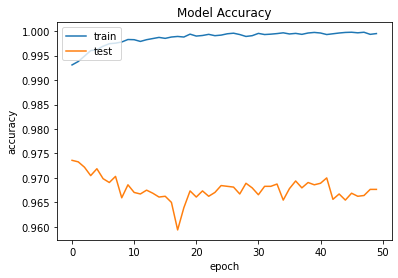

In [123]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

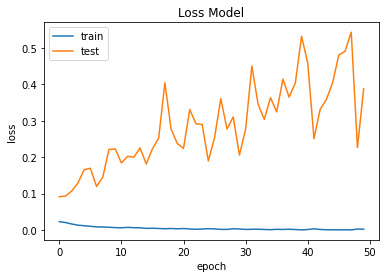

In [124]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()